In [20]:
import pandas as pd
import numpy as np
import pickle
import time
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from xgboost import plot_importance
import xgboost as xgb
import matplotlib.pyplot as plt
import sys
import gc

In [2]:
def save_pkl(file_dir, data):
    f = open(file_dir,"wb")
    pickle.dump(data, f, protocol=4)
    f.close()
    
def read_pkl(file_dir):
    f = open(file_dir,"rb")
    data = pickle.load(f)
    return data

In [3]:
# load the whole size dataset
X = np.load("London/X_s.npy")
Y_NO2 = np.load("London/Y_NO2_s.npy")
Y_PM10 = np.load("London/Y_PM10_s.npy")
Y_PM25 = np.load("London/Y_PM25_s.npy")

# PM25

In [6]:
# split the Y_PM25, X into training part and testing part
train_X_PM25, test_X_PM25, train_Y_PM25, test_Y_PM25 = train_test_split(X, Y_PM25, test_size=0.2, random_state=11)
print(train_X_PM25.shape, test_X_PM25.shape, train_Y_PM25.shape, test_Y_PM25.shape)

(54412, 125) (13604, 125) (54412,) (13604,)


In [7]:
#XGBoost
ts = time.time()

model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    train_X_PM25, 
    train_Y_PM25, 
    eval_metric="rmse", 
    eval_set=[(train_X_PM25, train_Y_PM25), (test_X_PM25, test_Y_PM25)], 
    verbose=True, 
    early_stopping_rounds = 10)

pred = model.predict(test_X_PM25)
print (smape(pred, test_Y_PM25))
time.time() - ts

[0]	validation_0-rmse:18.6786	validation_1-rmse:18.4791
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:17.51	validation_1-rmse:17.3122
[2]	validation_0-rmse:16.4886	validation_1-rmse:16.2919
[3]	validation_0-rmse:15.6145	validation_1-rmse:15.4151
[4]	validation_0-rmse:14.8725	validation_1-rmse:14.6771
[5]	validation_0-rmse:14.2432	validation_1-rmse:14.054
[6]	validation_0-rmse:13.6995	validation_1-rmse:13.512
[7]	validation_0-rmse:13.2547	validation_1-rmse:13.0751
[8]	validation_0-rmse:12.8695	validation_1-rmse:12.7011
[9]	validation_0-rmse:12.5392	validation_1-rmse:12.3778
[10]	validation_0-rmse:12.2633	validation_1-rmse:12.1063
[11]	validation_0-rmse:12.0162	validation_1-rmse:11.867
[12]	validation_0-rmse:11.8141	validation_1-rmse:11.6695
[13]	validation_0-rmse:11.65	validation_1-rmse:11.5092
[14]	validation_0-rmse:11.5081	validation_1-rmse:11.3795
[15

[141]	validation_0-rmse:8.61832	validation_1-rmse:8.68447
[142]	validation_0-rmse:8.61284	validation_1-rmse:8.68026
[143]	validation_0-rmse:8.60358	validation_1-rmse:8.67209
[144]	validation_0-rmse:8.59302	validation_1-rmse:8.66233
[145]	validation_0-rmse:8.58555	validation_1-rmse:8.65702
[146]	validation_0-rmse:8.57916	validation_1-rmse:8.65093
[147]	validation_0-rmse:8.57143	validation_1-rmse:8.64311
[148]	validation_0-rmse:8.56266	validation_1-rmse:8.63449
[149]	validation_0-rmse:8.55344	validation_1-rmse:8.62351
[150]	validation_0-rmse:8.5351	validation_1-rmse:8.60711
[151]	validation_0-rmse:8.52224	validation_1-rmse:8.59481
[152]	validation_0-rmse:8.50678	validation_1-rmse:8.57816
[153]	validation_0-rmse:8.49636	validation_1-rmse:8.56866
[154]	validation_0-rmse:8.48605	validation_1-rmse:8.55923
[155]	validation_0-rmse:8.47796	validation_1-rmse:8.5519
[156]	validation_0-rmse:8.47128	validation_1-rmse:8.54581
[157]	validation_0-rmse:8.45158	validation_1-rmse:8.5253
[158]	validation_

[283]	validation_0-rmse:7.4872	validation_1-rmse:7.60864
[284]	validation_0-rmse:7.48274	validation_1-rmse:7.605
[285]	validation_0-rmse:7.4729	validation_1-rmse:7.59404
[286]	validation_0-rmse:7.46609	validation_1-rmse:7.58718
[287]	validation_0-rmse:7.46143	validation_1-rmse:7.58281
[288]	validation_0-rmse:7.45564	validation_1-rmse:7.57883
[289]	validation_0-rmse:7.44895	validation_1-rmse:7.57046
[290]	validation_0-rmse:7.44611	validation_1-rmse:7.5689
[291]	validation_0-rmse:7.4413	validation_1-rmse:7.56423
[292]	validation_0-rmse:7.438	validation_1-rmse:7.56172
[293]	validation_0-rmse:7.43322	validation_1-rmse:7.55716
[294]	validation_0-rmse:7.42473	validation_1-rmse:7.54931
[295]	validation_0-rmse:7.42226	validation_1-rmse:7.54687
[296]	validation_0-rmse:7.41767	validation_1-rmse:7.54326
[297]	validation_0-rmse:7.41118	validation_1-rmse:7.53686
[298]	validation_0-rmse:7.39696	validation_1-rmse:7.52451
[299]	validation_0-rmse:7.38948	validation_1-rmse:7.51678
[300]	validation_0-rms

[425]	validation_0-rmse:6.80936	validation_1-rmse:6.97876
[426]	validation_0-rmse:6.80485	validation_1-rmse:6.97348
[427]	validation_0-rmse:6.8018	validation_1-rmse:6.97054
[428]	validation_0-rmse:6.79906	validation_1-rmse:6.96761
[429]	validation_0-rmse:6.794	validation_1-rmse:6.96326
[430]	validation_0-rmse:6.79068	validation_1-rmse:6.96099
[431]	validation_0-rmse:6.78651	validation_1-rmse:6.95739
[432]	validation_0-rmse:6.78272	validation_1-rmse:6.9541
[433]	validation_0-rmse:6.77659	validation_1-rmse:6.94811
[434]	validation_0-rmse:6.77288	validation_1-rmse:6.94559
[435]	validation_0-rmse:6.76975	validation_1-rmse:6.94295
[436]	validation_0-rmse:6.76557	validation_1-rmse:6.93993
[437]	validation_0-rmse:6.76269	validation_1-rmse:6.93746
[438]	validation_0-rmse:6.75936	validation_1-rmse:6.93441
[439]	validation_0-rmse:6.7541	validation_1-rmse:6.92811
[440]	validation_0-rmse:6.7509	validation_1-rmse:6.92526
[441]	validation_0-rmse:6.74559	validation_1-rmse:6.92097
[442]	validation_0-r

[567]	validation_0-rmse:6.38331	validation_1-rmse:6.58222
[568]	validation_0-rmse:6.38204	validation_1-rmse:6.58133
[569]	validation_0-rmse:6.38106	validation_1-rmse:6.58015
[570]	validation_0-rmse:6.37903	validation_1-rmse:6.57847
[571]	validation_0-rmse:6.37669	validation_1-rmse:6.57787
[572]	validation_0-rmse:6.37465	validation_1-rmse:6.57574
[573]	validation_0-rmse:6.37408	validation_1-rmse:6.57516
[574]	validation_0-rmse:6.37215	validation_1-rmse:6.5743
[575]	validation_0-rmse:6.36798	validation_1-rmse:6.57053
[576]	validation_0-rmse:6.36633	validation_1-rmse:6.56935
[577]	validation_0-rmse:6.36451	validation_1-rmse:6.56798
[578]	validation_0-rmse:6.36226	validation_1-rmse:6.56579
[579]	validation_0-rmse:6.35981	validation_1-rmse:6.56287
[580]	validation_0-rmse:6.35748	validation_1-rmse:6.5613
[581]	validation_0-rmse:6.35434	validation_1-rmse:6.55877
[582]	validation_0-rmse:6.35048	validation_1-rmse:6.55622
[583]	validation_0-rmse:6.34858	validation_1-rmse:6.55419
[584]	validation

[709]	validation_0-rmse:6.10536	validation_1-rmse:6.33588
[710]	validation_0-rmse:6.10482	validation_1-rmse:6.3356
[711]	validation_0-rmse:6.10293	validation_1-rmse:6.33395
[712]	validation_0-rmse:6.10232	validation_1-rmse:6.33361
[713]	validation_0-rmse:6.10092	validation_1-rmse:6.33194
[714]	validation_0-rmse:6.09839	validation_1-rmse:6.3296
[715]	validation_0-rmse:6.09547	validation_1-rmse:6.326
[716]	validation_0-rmse:6.09353	validation_1-rmse:6.32436
[717]	validation_0-rmse:6.09045	validation_1-rmse:6.32197
[718]	validation_0-rmse:6.08948	validation_1-rmse:6.32115
[719]	validation_0-rmse:6.08694	validation_1-rmse:6.31868
[720]	validation_0-rmse:6.08536	validation_1-rmse:6.3178
[721]	validation_0-rmse:6.08281	validation_1-rmse:6.31503
[722]	validation_0-rmse:6.08015	validation_1-rmse:6.31174
[723]	validation_0-rmse:6.07764	validation_1-rmse:6.30928
[724]	validation_0-rmse:6.0765	validation_1-rmse:6.30868
[725]	validation_0-rmse:6.0747	validation_1-rmse:6.30724
[726]	validation_0-rm

[851]	validation_0-rmse:5.88426	validation_1-rmse:6.14325
[852]	validation_0-rmse:5.88351	validation_1-rmse:6.14289
[853]	validation_0-rmse:5.88047	validation_1-rmse:6.13936
[854]	validation_0-rmse:5.87944	validation_1-rmse:6.13906
[855]	validation_0-rmse:5.87687	validation_1-rmse:6.13712
[856]	validation_0-rmse:5.87502	validation_1-rmse:6.13564
[857]	validation_0-rmse:5.87358	validation_1-rmse:6.13416
[858]	validation_0-rmse:5.87213	validation_1-rmse:6.13284
[859]	validation_0-rmse:5.87095	validation_1-rmse:6.1316
[860]	validation_0-rmse:5.86974	validation_1-rmse:6.1311
[861]	validation_0-rmse:5.86778	validation_1-rmse:6.12955
[862]	validation_0-rmse:5.86572	validation_1-rmse:6.12708
[863]	validation_0-rmse:5.86487	validation_1-rmse:6.12584
[864]	validation_0-rmse:5.86307	validation_1-rmse:6.12415
[865]	validation_0-rmse:5.86236	validation_1-rmse:6.12366
[866]	validation_0-rmse:5.86115	validation_1-rmse:6.12277
[867]	validation_0-rmse:5.85939	validation_1-rmse:6.12024
[868]	validation

[993]	validation_0-rmse:5.70612	validation_1-rmse:5.99563
[994]	validation_0-rmse:5.70469	validation_1-rmse:5.99442
[995]	validation_0-rmse:5.70431	validation_1-rmse:5.99405
[996]	validation_0-rmse:5.70345	validation_1-rmse:5.9937
[997]	validation_0-rmse:5.70266	validation_1-rmse:5.99281
[998]	validation_0-rmse:5.70066	validation_1-rmse:5.99166
[999]	validation_0-rmse:5.69981	validation_1-rmse:5.99111


611.9339330196381

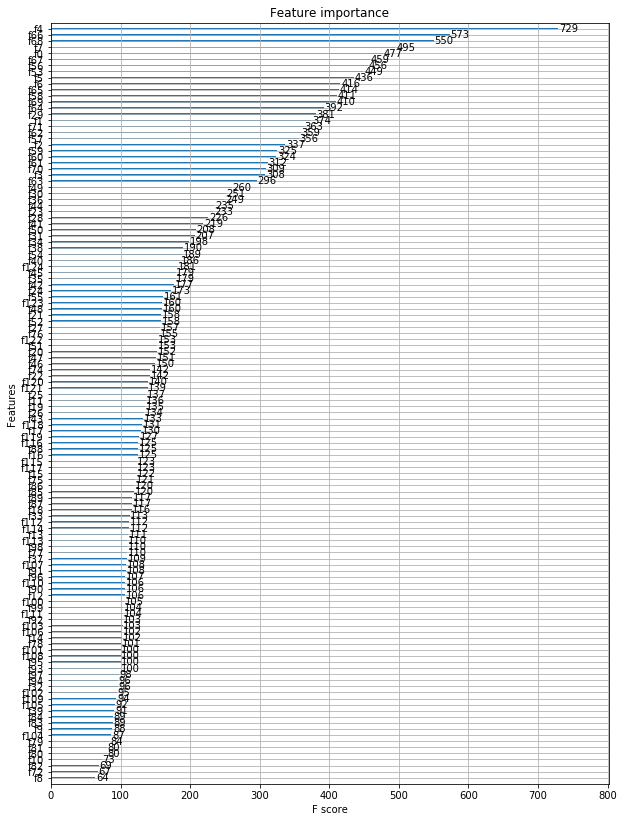

In [10]:
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (10,14))

# NO2

In [11]:
# split the Y_NO2, X into training part and testing part
train_X_NO2, test_X_NO2, train_Y_NO2, test_Y_NO2 = train_test_split(X, Y_NO2, test_size=0.2, random_state=11)
print(train_X_NO2.shape, test_X_NO2.shape, train_Y_NO2.shape, test_Y_NO2.shape)

(54412, 125) (13604, 125) (54412,) (13604,)


In [31]:
#XGBoost
ts = time.time()

model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    train_X_NO2, 
    train_Y_NO2, 
    eval_metric="rmse", 
    eval_set=[(train_X_NO2, train_Y_NO2), (test_X_NO2, test_Y_NO2)], 
    verbose=True, 
    early_stopping_rounds = 10)

pred = model.predict(test_X_NO2)
print (smape(pred, test_Y_NO2))
time.time() - ts

[0]	validation_0-rmse:62.58	validation_1-rmse:62.7251
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:57.3001	validation_1-rmse:57.4349
[2]	validation_0-rmse:52.6421	validation_1-rmse:52.776
[3]	validation_0-rmse:48.5333	validation_1-rmse:48.6629
[4]	validation_0-rmse:44.9302	validation_1-rmse:45.0568
[5]	validation_0-rmse:41.7879	validation_1-rmse:41.9095
[6]	validation_0-rmse:39.0495	validation_1-rmse:39.1708
[7]	validation_0-rmse:36.6697	validation_1-rmse:36.7889
[8]	validation_0-rmse:34.6272	validation_1-rmse:34.7481
[9]	validation_0-rmse:32.8655	validation_1-rmse:32.9862
[10]	validation_0-rmse:31.3743	validation_1-rmse:31.4971
[11]	validation_0-rmse:30.098	validation_1-rmse:30.2238
[12]	validation_0-rmse:29.0344	validation_1-rmse:29.1647
[13]	validation_0-rmse:28.1283	validation_1-rmse:28.2665
[14]	validation_0-rmse:27.3728	validation_1-rmse:27.5175


[141]	validation_0-rmse:19.0928	validation_1-rmse:19.566
[142]	validation_0-rmse:19.0649	validation_1-rmse:19.5423
[143]	validation_0-rmse:19.0407	validation_1-rmse:19.5217
[144]	validation_0-rmse:18.9929	validation_1-rmse:19.4752
[145]	validation_0-rmse:18.9596	validation_1-rmse:19.4377
[146]	validation_0-rmse:18.9463	validation_1-rmse:19.4246
[147]	validation_0-rmse:18.9284	validation_1-rmse:19.4064
[148]	validation_0-rmse:18.9034	validation_1-rmse:19.3812
[149]	validation_0-rmse:18.8972	validation_1-rmse:19.3759
[150]	validation_0-rmse:18.8843	validation_1-rmse:19.3696
[151]	validation_0-rmse:18.8609	validation_1-rmse:19.3475
[152]	validation_0-rmse:18.8103	validation_1-rmse:19.2893
[153]	validation_0-rmse:18.7923	validation_1-rmse:19.2715
[154]	validation_0-rmse:18.7486	validation_1-rmse:19.2265
[155]	validation_0-rmse:18.7294	validation_1-rmse:19.206
[156]	validation_0-rmse:18.7169	validation_1-rmse:19.194
[157]	validation_0-rmse:18.6887	validation_1-rmse:19.1648
[158]	validation_

[283]	validation_0-rmse:16.9408	validation_1-rmse:17.5154
[284]	validation_0-rmse:16.9304	validation_1-rmse:17.5075
[285]	validation_0-rmse:16.9256	validation_1-rmse:17.5013
[286]	validation_0-rmse:16.919	validation_1-rmse:17.4927
[287]	validation_0-rmse:16.9156	validation_1-rmse:17.4889
[288]	validation_0-rmse:16.9018	validation_1-rmse:17.476
[289]	validation_0-rmse:16.8931	validation_1-rmse:17.4701
[290]	validation_0-rmse:16.8864	validation_1-rmse:17.4644
[291]	validation_0-rmse:16.8783	validation_1-rmse:17.4579
[292]	validation_0-rmse:16.8739	validation_1-rmse:17.4533
[293]	validation_0-rmse:16.8663	validation_1-rmse:17.4464
[294]	validation_0-rmse:16.8572	validation_1-rmse:17.4359
[295]	validation_0-rmse:16.851	validation_1-rmse:17.429
[296]	validation_0-rmse:16.8415	validation_1-rmse:17.421
[297]	validation_0-rmse:16.8391	validation_1-rmse:17.419
[298]	validation_0-rmse:16.8356	validation_1-rmse:17.4168
[299]	validation_0-rmse:16.8284	validation_1-rmse:17.4104
[300]	validation_0-r

[425]	validation_0-rmse:16.0558	validation_1-rmse:16.7222
[426]	validation_0-rmse:16.0512	validation_1-rmse:16.7191
[427]	validation_0-rmse:16.0466	validation_1-rmse:16.7149
[428]	validation_0-rmse:16.0416	validation_1-rmse:16.7081
[429]	validation_0-rmse:16.0372	validation_1-rmse:16.7073
[430]	validation_0-rmse:16.0298	validation_1-rmse:16.7005
[431]	validation_0-rmse:16.0244	validation_1-rmse:16.6949
[432]	validation_0-rmse:16.022	validation_1-rmse:16.6931
[433]	validation_0-rmse:16.017	validation_1-rmse:16.6883
[434]	validation_0-rmse:16.013	validation_1-rmse:16.6846
[435]	validation_0-rmse:16.0104	validation_1-rmse:16.6814
[436]	validation_0-rmse:16.0065	validation_1-rmse:16.6772
[437]	validation_0-rmse:16.0013	validation_1-rmse:16.6713
[438]	validation_0-rmse:15.9954	validation_1-rmse:16.6645
[439]	validation_0-rmse:15.9905	validation_1-rmse:16.6608
[440]	validation_0-rmse:15.9853	validation_1-rmse:16.6572
[441]	validation_0-rmse:15.9787	validation_1-rmse:16.6509
[442]	validation_

[567]	validation_0-rmse:15.462	validation_1-rmse:16.1934
[568]	validation_0-rmse:15.4597	validation_1-rmse:16.1911
[569]	validation_0-rmse:15.4581	validation_1-rmse:16.1886
[570]	validation_0-rmse:15.4548	validation_1-rmse:16.1856
[571]	validation_0-rmse:15.4526	validation_1-rmse:16.1833
[572]	validation_0-rmse:15.4484	validation_1-rmse:16.1805
[573]	validation_0-rmse:15.4456	validation_1-rmse:16.177
[574]	validation_0-rmse:15.4416	validation_1-rmse:16.1737
[575]	validation_0-rmse:15.4328	validation_1-rmse:16.1622
[576]	validation_0-rmse:15.4262	validation_1-rmse:16.1548
[577]	validation_0-rmse:15.4207	validation_1-rmse:16.1504
[578]	validation_0-rmse:15.414	validation_1-rmse:16.1452
[579]	validation_0-rmse:15.4108	validation_1-rmse:16.1422
[580]	validation_0-rmse:15.4044	validation_1-rmse:16.1369
[581]	validation_0-rmse:15.401	validation_1-rmse:16.1349
[582]	validation_0-rmse:15.3971	validation_1-rmse:16.1313
[583]	validation_0-rmse:15.3947	validation_1-rmse:16.1289
[584]	validation_0

[709]	validation_0-rmse:15.003	validation_1-rmse:15.7806
[710]	validation_0-rmse:15.0005	validation_1-rmse:15.7794
[711]	validation_0-rmse:14.9986	validation_1-rmse:15.7786
[712]	validation_0-rmse:14.9963	validation_1-rmse:15.777
[713]	validation_0-rmse:14.9962	validation_1-rmse:15.7759
[714]	validation_0-rmse:14.9941	validation_1-rmse:15.7745
[715]	validation_0-rmse:14.9915	validation_1-rmse:15.7722
[716]	validation_0-rmse:14.9903	validation_1-rmse:15.7713
[717]	validation_0-rmse:14.9874	validation_1-rmse:15.7695
[718]	validation_0-rmse:14.9849	validation_1-rmse:15.7675
[719]	validation_0-rmse:14.9824	validation_1-rmse:15.7649
[720]	validation_0-rmse:14.9782	validation_1-rmse:15.7608
[721]	validation_0-rmse:14.9755	validation_1-rmse:15.7582
[722]	validation_0-rmse:14.9718	validation_1-rmse:15.7546
[723]	validation_0-rmse:14.9694	validation_1-rmse:15.7526
[724]	validation_0-rmse:14.9672	validation_1-rmse:15.7508
[725]	validation_0-rmse:14.9663	validation_1-rmse:15.7507
[726]	validation

[851]	validation_0-rmse:14.6646	validation_1-rmse:15.4831
[852]	validation_0-rmse:14.6631	validation_1-rmse:15.4822
[853]	validation_0-rmse:14.6604	validation_1-rmse:15.4798
[854]	validation_0-rmse:14.6568	validation_1-rmse:15.4768
[855]	validation_0-rmse:14.6545	validation_1-rmse:15.4744
[856]	validation_0-rmse:14.6533	validation_1-rmse:15.4733
[857]	validation_0-rmse:14.6523	validation_1-rmse:15.4729
[858]	validation_0-rmse:14.6513	validation_1-rmse:15.4729
[859]	validation_0-rmse:14.6488	validation_1-rmse:15.4708
[860]	validation_0-rmse:14.6467	validation_1-rmse:15.4706
[861]	validation_0-rmse:14.6446	validation_1-rmse:15.4685
[862]	validation_0-rmse:14.6432	validation_1-rmse:15.4683
[863]	validation_0-rmse:14.6419	validation_1-rmse:15.4682
[864]	validation_0-rmse:14.639	validation_1-rmse:15.4644
[865]	validation_0-rmse:14.6364	validation_1-rmse:15.462
[866]	validation_0-rmse:14.635	validation_1-rmse:15.4615
[867]	validation_0-rmse:14.6315	validation_1-rmse:15.4595
[868]	validation_

[993]	validation_0-rmse:14.3798	validation_1-rmse:15.2573
[994]	validation_0-rmse:14.378	validation_1-rmse:15.2564
[995]	validation_0-rmse:14.3773	validation_1-rmse:15.2557
[996]	validation_0-rmse:14.3751	validation_1-rmse:15.2546
[997]	validation_0-rmse:14.3716	validation_1-rmse:15.2498
[998]	validation_0-rmse:14.3699	validation_1-rmse:15.2482
[999]	validation_0-rmse:14.3682	validation_1-rmse:15.2472
0.20936542601541488


643.265144109726

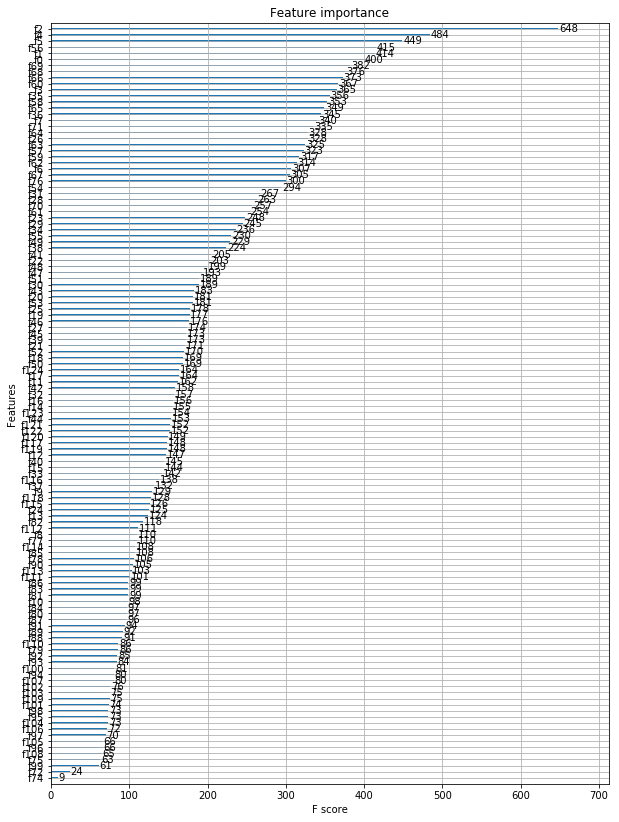

In [32]:
plot_features(model, (10,14))

# PM10

In [14]:
# split the Y_PM10, X into training part and testing part
train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10 = train_test_split(X, Y_PM10, test_size=0.2, random_state=11)
print(train_X_PM10.shape, test_X_PM10.shape, train_Y_PM10.shape, test_Y_PM10.shape)

(54412, 125) (13604, 125) (54412,) (13604,)


In [29]:
# grid search 

    reg = xgb.XGBRegressor(
    max_depth=5,
    learning_rate=0.001,
    n_estimators=2000,
    gamma=0.0,
    min_child_weight=2, 
    max_delta_step=0.0,
    colsample_bytree=0.6, 
    colsample_bylevel=0.9,
    subsample=0.9, 
    base_score=10,    
    seed=1)
    '''




IndentationError: unexpected indent (<ipython-input-29-afad818633bb>, line 3)

In [27]:
#XGBoost
def smape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / (y_true + y_pred) * 2)

ts = time.time()

model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    train_X_PM10, 
    train_Y_PM10, 
    #eval_metric="smape", 
    eval_set=[(train_X_PM10, train_Y_PM10), (test_X_PM10, test_Y_PM10)], 
    verbose=True, 
    early_stopping_rounds = 10)

pred = model.predict(test_X_PM10)
print (smape(pred, test_Y_PM10))
time.time() - ts

[0]	validation_0-rmse:26.7638	validation_1-rmse:26.5452
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:24.8427	validation_1-rmse:24.6245
[2]	validation_0-rmse:23.1777	validation_1-rmse:22.9586
[3]	validation_0-rmse:21.7353	validation_1-rmse:21.5193
[4]	validation_0-rmse:20.4921	validation_1-rmse:20.2762
[5]	validation_0-rmse:19.419	validation_1-rmse:19.2031
[6]	validation_0-rmse:18.5013	validation_1-rmse:18.2909
[7]	validation_0-rmse:17.7159	validation_1-rmse:17.5061
[8]	validation_0-rmse:17.0341	validation_1-rmse:16.8296
[9]	validation_0-rmse:16.4627	validation_1-rmse:16.2642
[10]	validation_0-rmse:15.994	validation_1-rmse:15.8061
[11]	validation_0-rmse:15.5786	validation_1-rmse:15.3938
[12]	validation_0-rmse:15.2264	validation_1-rmse:15.0524
[13]	validation_0-rmse:14.9293	validation_1-rmse:14.7644
[14]	validation_0-rmse:14.6751	validation_1-rmse:14.522

[141]	validation_0-rmse:10.9978	validation_1-rmse:11.088
[142]	validation_0-rmse:10.9901	validation_1-rmse:11.0827
[143]	validation_0-rmse:10.9788	validation_1-rmse:11.0706
[144]	validation_0-rmse:10.9672	validation_1-rmse:11.0602
[145]	validation_0-rmse:10.9648	validation_1-rmse:11.0581
[146]	validation_0-rmse:10.9586	validation_1-rmse:11.0533
[147]	validation_0-rmse:10.9484	validation_1-rmse:11.0428
[148]	validation_0-rmse:10.9413	validation_1-rmse:11.0365
[149]	validation_0-rmse:10.93	validation_1-rmse:11.0254
[150]	validation_0-rmse:10.9272	validation_1-rmse:11.0234
[151]	validation_0-rmse:10.9182	validation_1-rmse:11.016
[152]	validation_0-rmse:10.9064	validation_1-rmse:11.0048
[153]	validation_0-rmse:10.8984	validation_1-rmse:10.9978
[154]	validation_0-rmse:10.8899	validation_1-rmse:10.9918
[155]	validation_0-rmse:10.8814	validation_1-rmse:10.9833
[156]	validation_0-rmse:10.8693	validation_1-rmse:10.974
[157]	validation_0-rmse:10.8553	validation_1-rmse:10.9583
[158]	validation_0-

[283]	validation_0-rmse:9.86921	validation_1-rmse:10.0708
[284]	validation_0-rmse:9.86281	validation_1-rmse:10.0657
[285]	validation_0-rmse:9.85766	validation_1-rmse:10.0607
[286]	validation_0-rmse:9.85139	validation_1-rmse:10.0552
[287]	validation_0-rmse:9.84672	validation_1-rmse:10.0505
[288]	validation_0-rmse:9.84306	validation_1-rmse:10.0466
[289]	validation_0-rmse:9.83868	validation_1-rmse:10.0426
[290]	validation_0-rmse:9.83346	validation_1-rmse:10.0379
[291]	validation_0-rmse:9.82692	validation_1-rmse:10.0296
[292]	validation_0-rmse:9.81928	validation_1-rmse:10.023
[293]	validation_0-rmse:9.81222	validation_1-rmse:10.0171
[294]	validation_0-rmse:9.80751	validation_1-rmse:10.0144
[295]	validation_0-rmse:9.80323	validation_1-rmse:10.0099
[296]	validation_0-rmse:9.8008	validation_1-rmse:10.0067
[297]	validation_0-rmse:9.79401	validation_1-rmse:9.99949
[298]	validation_0-rmse:9.79004	validation_1-rmse:9.99595
[299]	validation_0-rmse:9.78777	validation_1-rmse:9.99504
[300]	validation

[425]	validation_0-rmse:9.28476	validation_1-rmse:9.5614
[426]	validation_0-rmse:9.28149	validation_1-rmse:9.55836
[427]	validation_0-rmse:9.27863	validation_1-rmse:9.55578
[428]	validation_0-rmse:9.27354	validation_1-rmse:9.55155
[429]	validation_0-rmse:9.26993	validation_1-rmse:9.54817
[430]	validation_0-rmse:9.26822	validation_1-rmse:9.5472
[431]	validation_0-rmse:9.26528	validation_1-rmse:9.54391
[432]	validation_0-rmse:9.26184	validation_1-rmse:9.54112
[433]	validation_0-rmse:9.25996	validation_1-rmse:9.53866
[434]	validation_0-rmse:9.25688	validation_1-rmse:9.53564
[435]	validation_0-rmse:9.25431	validation_1-rmse:9.5345
[436]	validation_0-rmse:9.25084	validation_1-rmse:9.53169
[437]	validation_0-rmse:9.25022	validation_1-rmse:9.53075
[438]	validation_0-rmse:9.24793	validation_1-rmse:9.52852
[439]	validation_0-rmse:9.24549	validation_1-rmse:9.52739
[440]	validation_0-rmse:9.24319	validation_1-rmse:9.52513
[441]	validation_0-rmse:9.24025	validation_1-rmse:9.52181
[442]	validation_

[567]	validation_0-rmse:8.88487	validation_1-rmse:9.22012
[568]	validation_0-rmse:8.88402	validation_1-rmse:9.2206
[569]	validation_0-rmse:8.88251	validation_1-rmse:9.21896
[570]	validation_0-rmse:8.88063	validation_1-rmse:9.21782
[571]	validation_0-rmse:8.87674	validation_1-rmse:9.2146
[572]	validation_0-rmse:8.87643	validation_1-rmse:9.21493
[573]	validation_0-rmse:8.87603	validation_1-rmse:9.21472
[574]	validation_0-rmse:8.87367	validation_1-rmse:9.21294
[575]	validation_0-rmse:8.87149	validation_1-rmse:9.20971
[576]	validation_0-rmse:8.86633	validation_1-rmse:9.20622
[577]	validation_0-rmse:8.86471	validation_1-rmse:9.20558
[578]	validation_0-rmse:8.86289	validation_1-rmse:9.20291
[579]	validation_0-rmse:8.86079	validation_1-rmse:9.20084
[580]	validation_0-rmse:8.85739	validation_1-rmse:9.1986
[581]	validation_0-rmse:8.85475	validation_1-rmse:9.19622
[582]	validation_0-rmse:8.85232	validation_1-rmse:9.19479
[583]	validation_0-rmse:8.84988	validation_1-rmse:9.19292
[584]	validation_

[709]	validation_0-rmse:8.59362	validation_1-rmse:8.97287
[710]	validation_0-rmse:8.59304	validation_1-rmse:8.97271
[711]	validation_0-rmse:8.59187	validation_1-rmse:8.97146
[712]	validation_0-rmse:8.58949	validation_1-rmse:8.96927
[713]	validation_0-rmse:8.58705	validation_1-rmse:8.96675
[714]	validation_0-rmse:8.58488	validation_1-rmse:8.96599
[715]	validation_0-rmse:8.58379	validation_1-rmse:8.96519
[716]	validation_0-rmse:8.58147	validation_1-rmse:8.96445
[717]	validation_0-rmse:8.57873	validation_1-rmse:8.96244
[718]	validation_0-rmse:8.57621	validation_1-rmse:8.9604
[719]	validation_0-rmse:8.57488	validation_1-rmse:8.95913
[720]	validation_0-rmse:8.57288	validation_1-rmse:8.95801
[721]	validation_0-rmse:8.57182	validation_1-rmse:8.95726
[722]	validation_0-rmse:8.57009	validation_1-rmse:8.95594
[723]	validation_0-rmse:8.56941	validation_1-rmse:8.95535
[724]	validation_0-rmse:8.5673	validation_1-rmse:8.95332
[725]	validation_0-rmse:8.56683	validation_1-rmse:8.95344
[726]	validation

[851]	validation_0-rmse:8.36398	validation_1-rmse:8.78862
[852]	validation_0-rmse:8.36261	validation_1-rmse:8.78754
[853]	validation_0-rmse:8.36188	validation_1-rmse:8.78641
[854]	validation_0-rmse:8.36041	validation_1-rmse:8.78538
[855]	validation_0-rmse:8.35827	validation_1-rmse:8.78398
[856]	validation_0-rmse:8.35755	validation_1-rmse:8.78361
[857]	validation_0-rmse:8.35597	validation_1-rmse:8.78213
[858]	validation_0-rmse:8.35541	validation_1-rmse:8.78127
[859]	validation_0-rmse:8.35446	validation_1-rmse:8.78056
[860]	validation_0-rmse:8.35289	validation_1-rmse:8.77937
[861]	validation_0-rmse:8.35029	validation_1-rmse:8.77632
[862]	validation_0-rmse:8.34979	validation_1-rmse:8.77592
[863]	validation_0-rmse:8.34844	validation_1-rmse:8.77424
[864]	validation_0-rmse:8.34763	validation_1-rmse:8.77397
[865]	validation_0-rmse:8.34598	validation_1-rmse:8.77282
[866]	validation_0-rmse:8.34483	validation_1-rmse:8.77228
[867]	validation_0-rmse:8.34374	validation_1-rmse:8.77107
[868]	validati

[993]	validation_0-rmse:8.18818	validation_1-rmse:8.65116
[994]	validation_0-rmse:8.18701	validation_1-rmse:8.65051
[995]	validation_0-rmse:8.18614	validation_1-rmse:8.65005
[996]	validation_0-rmse:8.18529	validation_1-rmse:8.64907
[997]	validation_0-rmse:8.18419	validation_1-rmse:8.64731
[998]	validation_0-rmse:8.18289	validation_1-rmse:8.64629
[999]	validation_0-rmse:8.18262	validation_1-rmse:8.64564
0.2727320792123933


647.761666059494

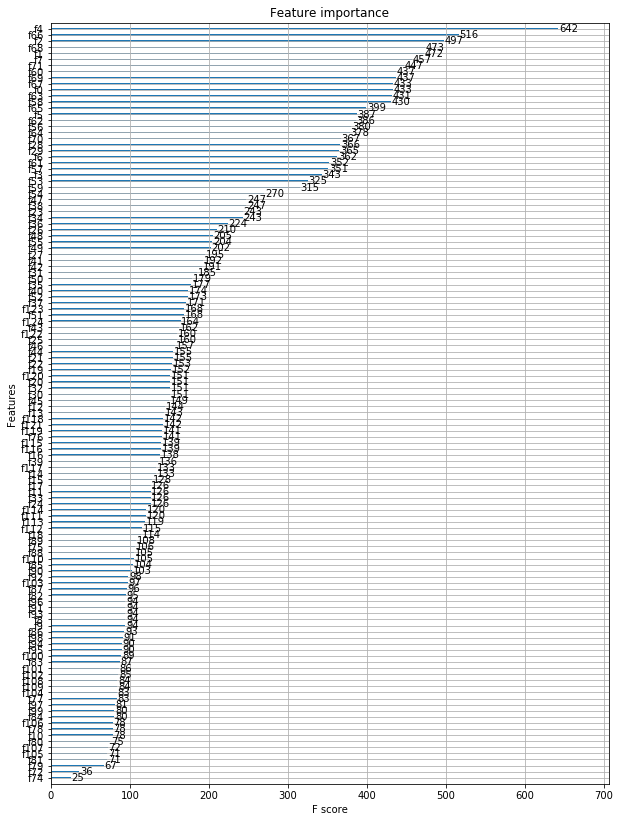

In [28]:
plot_features(model, (10,14))

In [ ]:
#grid search 
params = {
    # 'objective': reg:linear,
    'max_depth': 5,
    # 'learning_rate':0.001,
    'learning_rate': 0.001,
    'n_estimators': 2000,
    'gamma': 0.0,
    'min_child_weight': 2,
    'max_delta_step': 0,
    'subsample': 0.9,
    'colsample_bytree': 0.6,
    'colsample_bylevel': 0.9,
    'base_score': 10,
    'seed': 1
}

'''
'max_depth': 10,
'learning_rate': 0.001,
# 'learning_rate': 0.02,
'n_estimators': 3000,
'gamma': 0.8,
'min_child_weight': 2,
'reg_alpha': 0.001,
'max_delta_step': 0,
'subsample': 0.8,
'colsample_bytree': 0.8,
'colsample_bylevel': 0.9,
'base_score': 10,
'seed': 1,
'nthread': 10
'''

param_test1 = {
    'max_depth': range(7, 12, 2),
    'min_child_weight': [2],
    'gamma': [i / 10.0 for i in range(8, 9)],
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)],
    'reg_alpha': [0, 0.001, 0.001],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [1000, 2000, 3000]
}

param_test3 = {
    'gamma': [i / 10.0 for i in range(0, 10)]
}

param_test4 = {
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)]
}

param_test6 = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}

param_test7 = {
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]
}

param_test8 = {
    'learning_rate': [0.001, 0.002, 0.005, 0.01, 0.1],
    'n_estimators': [2000, 3000, 4000],
}

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=2)
gsearch1 = GridSearchCV(
    estimator=xgb.XGBRegressor(learning_rate=0.001, n_estimators=3000, max_depth=10, min_child_weight=2,
                               reg_alpha=0.001, gamma=0.6, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1,
                               seed=27), param_grid=params, scoring=scoring, n_jobs=-1, cv=cv, verbose=6)
print 1
gsearch1.fit(train_X, train_Y)
print gsearch1.grid_scores_, gsearch1.best_score_
print gsearch1.best_params_
